<a href="https://colab.research.google.com/github/tahamsi/Computer-Vision/blob/main/Face_Recognition_VGGFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/tahamsi/Computer-Vision)

# Face Recognition



*The MTCNN is employed for face detection and serves as the backbone for face extraction in this project. To delve deeper into MTCNN, you can explore the relevant project on [GitHub](https://github.com/tahamsi/Computer-Vision/blob/main/Face_Detection_MTCNN.ipynb).*

**Face recognition** involves the general task of identifying and confirming individuals from images of their faces. There are two primary models within facial recognition ( [Handbook of Face Recognition, 2011](https://www.amazon.com/Handbook-Face-Recognition-Stan-Z/dp/085729931X/ref=as_li_ss_tl?ie=UTF8&qid=1551046348&sr=8-1&keywords=Handbook+of+Face+Recognition&linkCode=sl1&tag=inspiredalgor-20&linkId=f7911d8d0a87a5449fb48071b1c5ad1a&language=en_US)):


*   Face Verification: This model involves a one-to-one comparison of a given face with a known identity (e.g., confirming if this person matches the identity).
Face Identification: This model entails a one-to-many comparison of a given face against a database of known faces (e.g., determining the person's identity from a group of individuals).
*   A face recognition system is designed to automatically identify faces within images and videos. It can operate in either or both of two modes: (1) face verification (or authentication) and (2) face identification (or recognition).

*The **VGGFace** and **VGGFace2** models, crafted by researchers at the Visual Geometry Group at Oxford, stand as two cutting-edge deep learning models for facial recognition.*

The **VGGFace** series comprises models specifically designed for face recognition and validated on benchmark computer vision datasets by the Visual Geometry Group (VGG) at the University of Oxford. At present, two primary VGG models for face recognition exist: **VGGFace** and **VGGFace2**. Let's delve deeper into each of these models individually.

# VGGFace Model
The **VGGFace model**, was outlined by Omkar Parkhi in the 2015 paper titled “[Deep Face Recognition](https://www.robots.ox.ac.uk/~vgg/publications/2015/Parkhi15/parkhi15.pdf).” A key aspect of this paper was the methodology for curating an extensive training dataset, crucial for training modern convolutional neural network-based face recognition systems. This approach aimed to rival the large datasets utilized by Facebook and Google for training models. The dataset formed the foundation for developing deep CNNs tailored for face recognition tasks, encompassing face identification and verification. Specifically, the models were trained on this extensive dataset and subsequently evaluated on established face recognition benchmarks, illustrating the model's proficiency in generating generalized features from facial images.

Initially, the process involved training a face classifier utilizing a softmax activation function in the output layer to categorize faces as specific individuals. Subsequently, this layer was removed, resulting in the network outputting a vector feature representation known as a face embedding. Further refinement of the model was conducted through fine-tuning, employing a triplet loss function to minimize the Euclidean distance between vectors representing the same identity and maximize the distance between vectors representing different identities.

The architecture of the **VGGFace** model utilized a deep convolutional neural network in the VGG style, comprising blocks of convolutional layers with small kernels and Rectified Linear Unit (ReLU) activations, followed by max-pooling layers. Additionally, fully connected layers were incorporated at the classifier end of the network.

#VGGFace2 Model
Qiong Cao et al. (2017) in their 2017 paper titled “[VGGFace2: A dataset for recognizing faces across pose and age](https://arxiv.org/abs/1710.08092),” from the VGG present subsequent work following up on their prior research. They introduce VGGFace2 as a considerably larger dataset, meticulously collected to facilitate the training and evaluation of more proficient face recognition models. The paper extensively details the dataset's collection, curation, and the preprocessing steps applied to the images before model development. However, VGGFace2 has now become synonymous with the pre-trained models tailored for face recognition, which were trained on this extensive dataset.
The models, specifically a ResNet-50 and a SqueezeNet-ResNet-50 (referred to as SE-ResNet-50 or SENet), and their variations have been made accessible by the authors, along with the associated code. These models were rigorously evaluated on established face recognition datasets, showcasing their cutting-edge performance.

Each model predicts a face embedding, represented as a 2,048-length vector, which is subsequently normalized—typically to a length of 1 or unit norm—using the L2 vector norm (Euclidean distance from the origin). This normalized vector is commonly referred to as the ‘face descriptor.' The Cosine similarity is employed to calculate the distance between face descriptors or groups of face descriptors, known as ‘subject templates.'
The 2048-dimensional face descriptor is extracted from the layer adjacent to the classifier layer, and then further normalized using L2 normalization.

Source: https://machinelearningmastery.com/how-to-perform-face-recognition-with-vggface2-convolutional-neural-network-in-keras/

# Prepare the environment

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Nov 14 19:50:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install all required packages as follow:

In [2]:
! pip install keras_vggface
! pip install keras_applications --no-deps
! pip install mtcnn
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.1 MB/s eta 0:00:00


**Note**: Please execute the following commands to ensure VGGFace compatibility with the most recent Keras version *italicized text*

In [3]:
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('from keras.utils', 'from tensorflow.python.keras.utils'))
filename = "/usr/local/lib/python3.10/dist-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
filename2 = "/usr/local/lib/python3.10/dist-packages/keras_vggface/utils.py"
text = open(filename2).read()
open(filename2, "w+").write(text.replace('from keras.utils.data_utils', 'from tensorflow.python.keras.utils.data_utils'))

3847

Import all the necessary libraries for this project, including TensorFlow for the main framework, Matplotlib for visualization, urllib.request.urlopen for downloading data from a web address, PIL.Image for reading an image file, NumPy for data manipulation, and os for running several operating system's command. Moreover, MTCNN as the main class for face detection abd VGGFace as the main class for creating embeddings.

In [4]:
import tensorflow as tf
import keras
from keras_vggface.vggface import VGGFace
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from scipy.spatial.distance import cosine
from keras_vggface.utils import preprocess_input
from skimage import color
import numpy as np
import os
from urllib.request import urlopen
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Develop a class incorporating essential methods, including:
*   draw_facebox: This method is designed for drawing a bounding box around each identified face.

*   cover_facebox: Utilize this method to identify facial keypoints and cover them with a circle.
*   extract_face: Specify the image size (default is 224 by 224) within this function. It accepts a filename (modifiable to an opened file), a pre-trained neural network for detection (in this instance, MTCNN), and returns a list of embeddings. The length of the list corresponds to the number of detected faces.
*   look_for_faces: This method takes an image file as input and searches for all faces within the given file.
*   get_embeddings: This method processes an image using an instance of MTCNN to extract faces and an instance of VGGFace (either VGGFace 1 or VGGFace 2) and yields a high-dimensional abstract embedding vectors linked to that specific image.
*   is_match: This method assesses whether two face embeddings match by utilizing the cosine distance between them.
*   find_match: This method takes a photo of a known face and an image containing several unknown faces, aiming to identify the known face among the unknown ones if it is present in the image.

In [98]:
class Face:
  def __init__(self, model_type, pooling_type):
    self.detector = MTCNN()
    self.model = VGGFace(model = model_type, include_top=False, input_shape=(224, 224, 3), pooling = pooling_type)

  def draw_facebox(self, filename):
    pixels = np.asarray(filename)
    pyplot.imshow(pixels)
    results = self.detector.detect_faces(pixels)
    ax = pyplot.gca()
    for result in results:
        x, y, width, height = result['box']
        rect = pyplot.Rectangle((x, y), width, height, fill=False, color='orange')
        ax.add_patch(rect)
    pyplot.show()

  def cover_facebox(self, filename, radius, color):
    pixels = np.asarray(filename)
    pyplot.imshow(pixels)
    results = self.detector.detect_faces(pixels)
    ax = pyplot.gca()
    for result in results:
      for key, value in result['keypoints'].items():
        # create and draw dot
        dot = pyplot.Circle(value, radius = radius, color = color)
        ax.add_patch(dot)
    return ax

  def extract_face(self, filename, required_size=(224, 224)):
    pixels = np.asarray(filename)
    results = self.detector.detect_faces(pixels)
    if len(results)==0:
        return -1
    res = []
    for result in results:
        x1, y1, width, height = result['box']
        x2, y2 = x1 + width, y1 + height
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face.copy())
        image = image.resize(required_size)
        face_array = asarray(image)
        res.append(face_array)
    return res

  def look_for_faces(self, file_name, show=True):
    pixels = self.extract_face(file_name)
    if pixels ==0:
      print("No face has been detected!")
    else:
      if show:
        for pixel in pixels:
          pyplot.imshow(pixel)
          pyplot.show()
      else:
        print(len(pixels), "faces have been detected!")


  def get_embeddings(self,filenames):
    faces = self.extract_face(filenames)
    if faces == -1:
      return -1
    samples = asarray(faces, 'float32')
    samples = preprocess_input(samples, version=2) # version = 1: VGGFace1
    yhat = self.model.predict(samples)
    return yhat, faces

  def is_match(self,known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
      return 1
    return 0

  def find_match(self,konwn_img, candidate_imgs, thresh = 0.5):
    known_embedding, known_face = self.get_embeddings(konwn_img)
    unknowns_embeddings, unknown_faces = self.get_embeddings(candidate_imgs)

    if known_embedding.any() == -1 or unknowns_embeddings.any() == -1:
      print('There is no detected face in either of these images!')
      return 0

    for embeding in list(zip(unknowns_embeddings, unknown_faces)):
      if self.is_match(known_embedding[0], embeding[0],0.4):
        f, axarr = pyplot.subplots(1,2)
        axarr[0].imshow(known_face[0])
        axarr[1].imshow(embeding[1])
        pyplot.title("Found a match")
        pyplot.show()

# Running the model

**Instanciate the Face class**

**VGGFace** offers three pre-trained versions: '*vgg16*', '*resnet50*', and '*senet50*'. Additionally, you can choose between '*avg*' or '*max*' as the pooling strategy.

In [99]:
face = Face("resnet50", "max")

**Load the image file**

Note: Feel free to upload an image file that captures your interest and may contain one or more faces. You can accomplish this by either sharing its URL or directly loading it into Colab from your local machine, as depicted in the figure below.

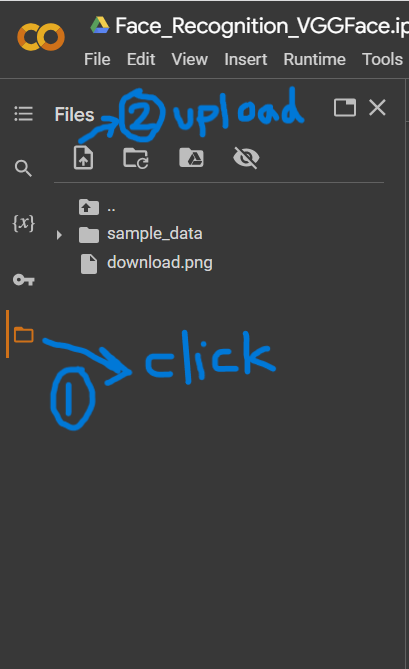

**Image from a few unknown faces**

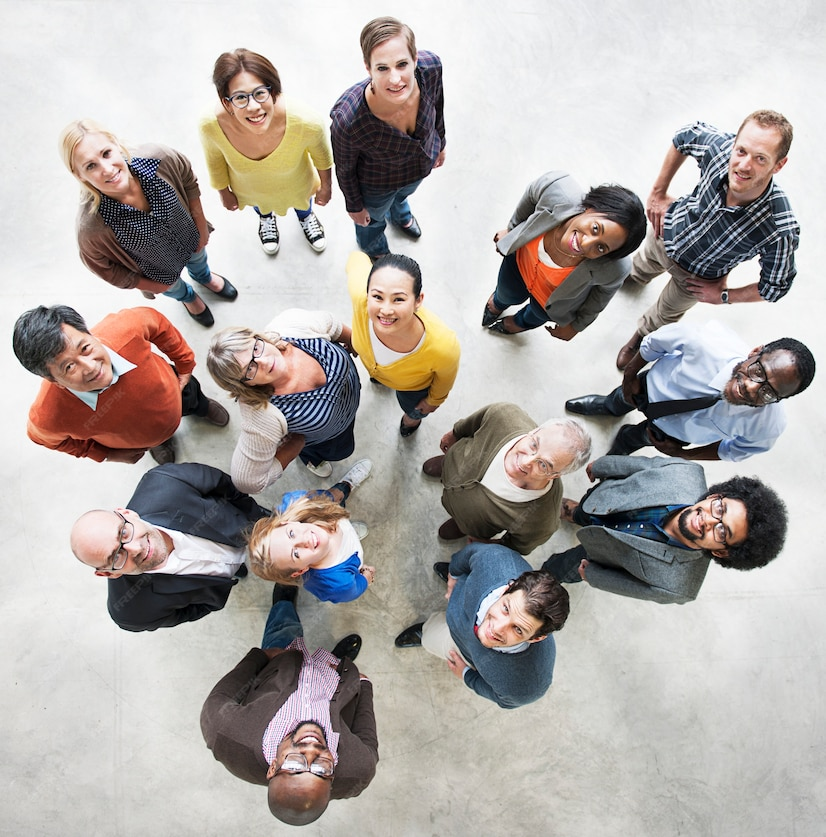

In [104]:
url_1 = "https://img.freepik.com/premium-photo/blurred-vision-diverse-people_53876-10652.jpg?w=826"
img = Image.open(urlopen(url_1))
img

**Image of a known face**

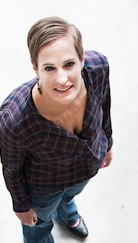

In [105]:
url_2 = "https://docs.google.com/uc?export=download&id=1kOpzYeN9jtHZJhQQTTBaqlSYkjtUeRx9"
known = Image.open(urlopen(url_2))
known

Compare these two files together, experimenting with various threshold values. A higher threshold identifies individuals who might share some similarity, while a lower threshold matches individuals who are very similar to each other.

1/1 [==============================] - 0s 24ms/step


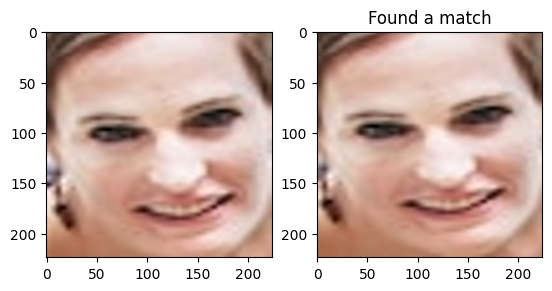

In [100]:
face.find_match(known,img, thresh = 0.3)